In [1]:
import numpy as np
from scipy.interpolate import UnivariateSpline
from scipy.optimize import minimize

import dynesty
from dynesty import plotting as dyplot

import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.signal as signal

mpl.rc('font', size=18)
mpl.rc('text', usetex=True)
mpl.rc('font', family='serif', serif='palatino')

#  $$Q1$$

In [2]:
fileName = 'timeseries.txt'
data = np.genfromtxt(fileName)

In [3]:
t = data[1:,0]
y = data[1:,1]

### a)

In [4]:
f, psd = signal.periodogram(y)

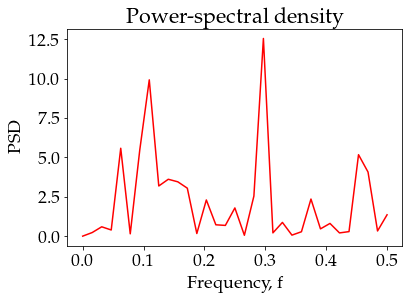

In [5]:
plt.plot(f, psd, color = 'Red')
plt.xlabel("Frequency, f")
plt.ylabel("PSD")
plt.title("Power-spectral density")
plt.show()

### The most dominant contributing frequency is 0.3

---

### b)

In [6]:
f, psd_padded = signal.periodogram(y, nfft = 256)

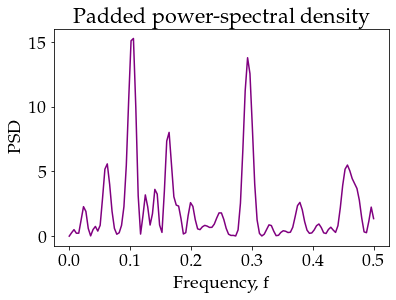

In [7]:
plt.plot(f, psd_padded, color = 'purple')
plt.xlabel("Frequency, f")
plt.ylabel("PSD")
plt.title("Padded power-spectral density")
plt.show()

#### What changed in the plot due to the padding is how many times the curve crosses 0 because padding with 0 means that we will have more zero points in the sinusoidal equation given to us, $y_{i} = A\sin{(2\pi ft_{i} + \phi)} + \epsilon_{i}$. So, we can see that in the unpadded vs padded psd plot near the $f \epsilon$ [0.1, 0.2] the plots look very different. In the unpadded the psd plot does not fall to 0 unlike in the padded plot due to the extra zeroes added in the array.

---

### c)

In [8]:
f, psd_boxcar = signal.periodogram(y, window = "boxcar", nfft = 256)

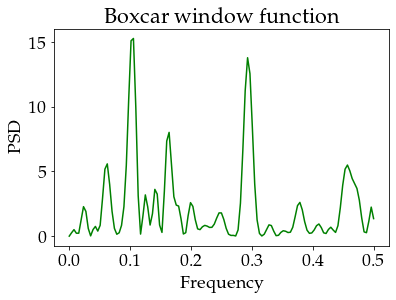

In [9]:
plt.plot(f, psd_boxcar, color = 'green')
plt.xlabel("Frequency")
plt.ylabel("PSD")
plt.title("Boxcar window function")
plt.show()

In [10]:
f, psd_triang = signal.periodogram(y, window = "triang", nfft = 256)

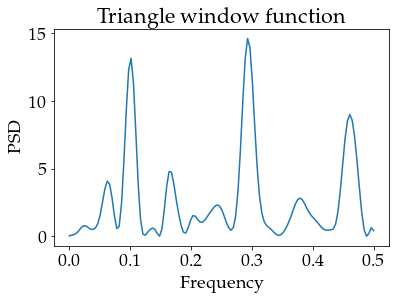

In [11]:
plt.plot(f, psd_triang)
plt.xlabel("Frequency")
plt.ylabel("PSD")
plt.title("Triangle window function")
plt.show()

In [12]:
f, psd_blackmanHarr = signal.periodogram(y, window = "blackmanharris", nfft = 256)

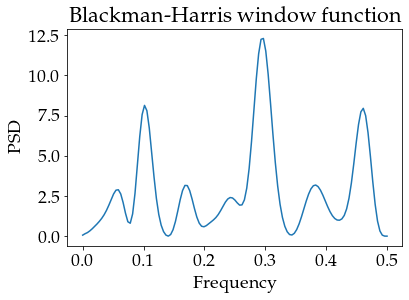

In [13]:
plt.plot(f, psd_blackmanHarr)
plt.xlabel("Frequency")
plt.ylabel("PSD")
plt.title("Blackman-Harris window function")
plt.show()

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


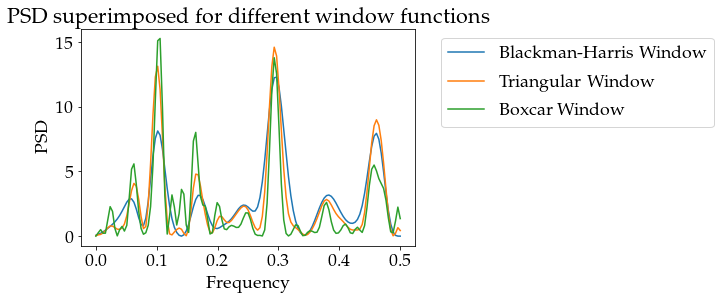

In [14]:
plt.plot(f, psd_blackmanHarr, label = "Blackman-Harris Window")
plt.plot(f, psd_triang,  label = "Triangular Window")
plt.plot(f, psd_boxcar,  label = "Boxcar Window")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("PSD superimposed for different window functions")
plt.xlabel("Frequency")
plt.ylabel("PSD")
plt.show()

#### Depending on the type of window function we used we get different widths of the peaks and also different behaviors in the other peaks that are not the maximum peak. From the plots above we can see that for the boxcar window we get the sharpest peaks where as the Blackman-Harris gives us the thickest peaks out of the three. In addition to the width of the major peaks we also notice differences in the other smaller peaks where certain window functions seem to 'smoothen' the psd more than the others essentially 'reducing the noise.' 

#### Why this happens is because the new psd is generated through convolution and depends on the distribution of the window functions themselves and looking at the different window functions in lecture we can make sense of why some of them show certain behavior compared to the others.


---

# $$Q2$$

### a)

In [15]:
f, psd_blackmanHarr = signal.periodogram(y, window = "blackmanharris", nfft = 256)
pfn = np.exp(psd_blackmanHarr)

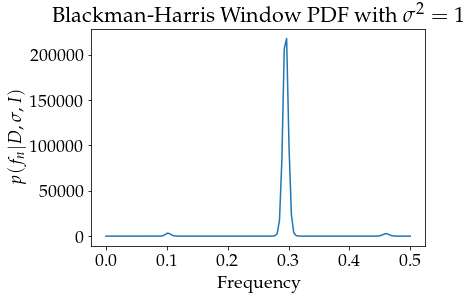

In [16]:
plt.plot(f, pfn)
plt.xlabel("Frequency")
plt.ylabel(r'$p(f_{n}|D, \sigma, I)$')
plt.title(r"Blackman-Harris Window PDF with $\sigma^{2} = 1$")
plt.show()

### b)

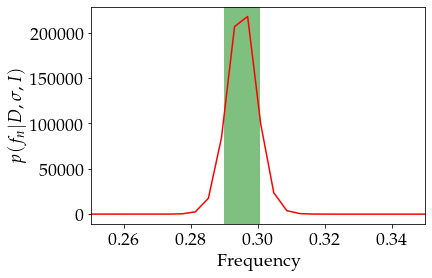

FWHM = [0.290, 0.300]


In [17]:
spline = UnivariateSpline(f, pfn - (max(pfn))/2, s=0)
r1, r2 = spline.roots() # find the roots

plt.plot(f, pfn, color = 'r')
plt.ylabel(r'$p(f_{n}|D, \sigma, I)$')
plt.xlabel('Frequency')
plt.xlim(0.25, 0.35)
plt.axvspan(r1, r2, facecolor='g', alpha=0.5)
plt.show()

print("FWHM = [{:5.3f}, {:5.3f}]".format(r1, r2))

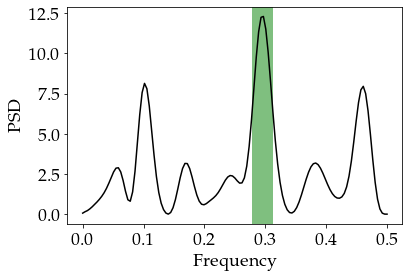

FWHM = [0.278, 0.313]


In [18]:
spline = UnivariateSpline(f, psd_blackmanHarr - (max(psd_blackmanHarr))/2, s=0)
r1, r2, r3, r4, r5, r6 = spline.roots() # find the roots

plt.plot(f, psd_blackmanHarr, color = 'black')
plt.ylabel('PSD')
plt.xlabel('Frequency')
plt.axvspan(r3, r4, facecolor='g', alpha=0.5)
plt.show()

print("FWHM = [{:5.3f}, {:5.3f}]".format(r3, r4))

#### The FWHM for the PDF function is narrower than that of the PSD.
$$\text{FWHM}_\text{pdf} = [0.290, 0.300]$$ 
$$\text{FWHM}_\text{psd} = [0.278, 0.313]$$
#### So the range for PDF is 0.1 and for PSD it is 0.035

### c)

In [19]:
N = 64
mean_ySq = 1/N * sum(y**2)

pfn_stud = (1 - ((2 * psd_blackmanHarr) / (N * mean_ySq))) ** ((2 - N) / 2)

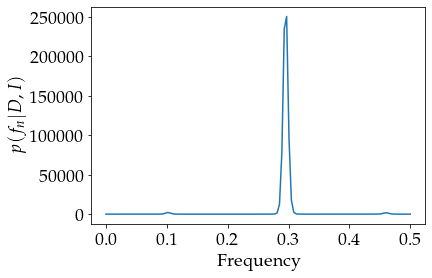

In [20]:
plt.plot(f, pfn_stud)
plt.ylabel(r'$p(f_{n}|D, I)$')
plt.xlabel('Frequency')
plt.show()

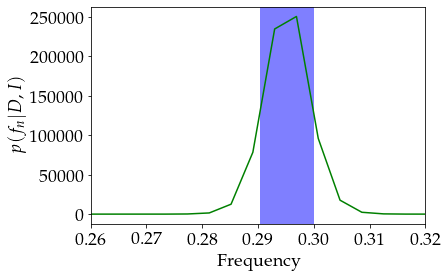

FWHM = [0.290, 0.300]


In [21]:
spline = UnivariateSpline(f, pfn_stud - (max(pfn_stud))/2, s=0)
r1, r2 = spline.roots() # find the roots

plt.plot(f, pfn_stud, color = 'g')
plt.ylabel(r'$p(f_{n}|D, I)$')
plt.xlabel('Frequency')
plt.xlim(0.26, 0.32)
plt.axvspan(r1, r2, facecolor='b', alpha=0.5)
plt.show()

print("FWHM = [{:5.3f}, {:5.3f}]".format(r1, r2))

$$\text{FWHM}_\text{pdf} = [0.290, 0.300]$$ 
#### So range is 0.1

2d)

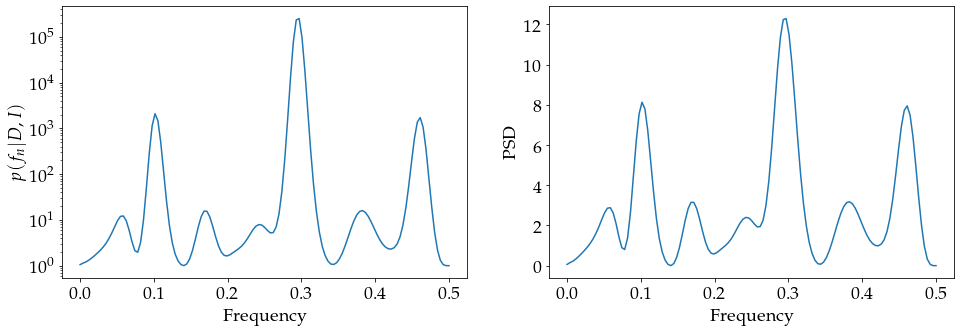

In [22]:
fig, ax = plt.subplots(1, 2, figsize = (16,5))
ax[0].semilogy(f, pfn_stud)
ax[0].set_ylabel(r'$p(f_{n}|D, I)$')
ax[0].set_xlabel('Frequency')
ax[1].plot(f, psd_blackmanHarr)
ax[1].set_ylabel('PSD')
ax[1].set_xlabel('Frequency')
plt.show()

#### The shape of the two plots look identical (even though the y axis are obviously not the same scale) because taking the natural log of the pdf essentially scales the values but does not change the shape and so it 'looks' like the psd itself represented by $C(f_n)$